# Лабораторная работа №4
Группа 45/2
---

**Импорт библиотек**

In [35]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel

**Задание 1.**
Загрузить датасет "Boston Housing" из библиотеки scikit-learn (load_boston).

In [36]:
data = pd.read_csv("boston_house_prices.csv")

# Подавить предупреждения для задания 9
warnings.filterwarnings("ignore", category=UserWarning)

**Задание 2.**
Изучите структуру и содержание данных.

In [37]:
# Первые несколько строк датасета, чтобы понять его структуру и содержание
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [38]:
# Общая информация о датасете: количество записей, количество столбцов и типы данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [39]:
# Cтатистическое описание данных
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [40]:
print(data['MEDV'].value_counts())

MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64


**Задание 3.**
Провести предварительный анализ данных, включая проверку наличия пропущенных значений, выбросов и корреляции между переменными.

In [41]:
# Проверка наличия пропущенных значений
missing_values = data.isnull().sum()
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


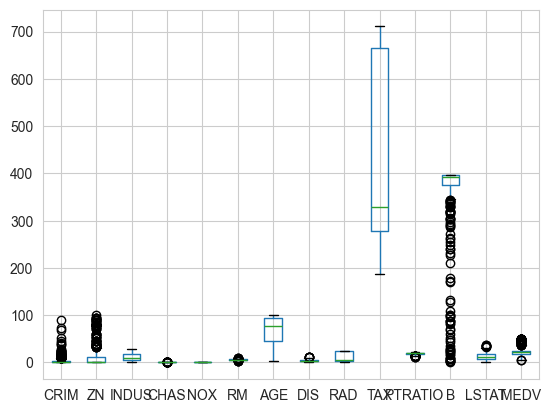

In [42]:
# Проверка выбросов
data.boxplot(column=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])
plt.show()

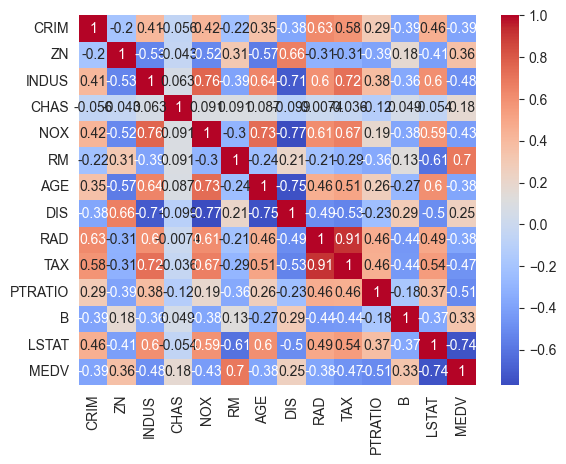

In [43]:
# Корреляция между переменными
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Задание 4.**
Разбить данные на обучающую и тестовую выборки в соотношении 70/30.

X_train - обучающие признаки
X_test - тестовые признаки
y_train - обучающая целевая переменная
y_test - тестовая целевая переменная

test_size=0.3 означает, что 30% данных будут использованы для тестирования, а 70% для обучения
random_state=42 - это значение seed для воспроизводимости результатов

In [44]:
# Разделите данные на признаки (X) и целевую переменную (y)
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задание 5.**
Обучить модель линейной регрессии на обучающей выборке.

In [45]:
# Создаем объект модели линейной регрессии
model = LinearRegression()

# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)
y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 354, dtype: float64

**Задание 6.**
Оценить качество модели на тестовой выборке с помощью таких метрик как средняя абсолютная ошибка (MAE), средняя квадратичная ошибка (MSE), корень среднеквадратичной ошибки (RMSE) и коэффициент детерминации (R^2).

In [46]:
# Прогноз на тестовых данных
y_pred = model.predict(X_test)

# Считаем MAE (средняя абсолютная ошибка)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Считаем MSE (средняя квадратичная ошибка)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Считаем RMSE (корень среднеквадратичной ошибки)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Считаем R^2 (коэффициент детерминации)
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

MAE: 3.1627098714573973
MSE: 21.517444231177127
RMSE: 4.638689926172812
R^2: 0.7112260057484943


**Задание 7.**
Визуализируйте результаты предсказания, сравнив исходные значения цены недвижимости с предсказанными значениями.

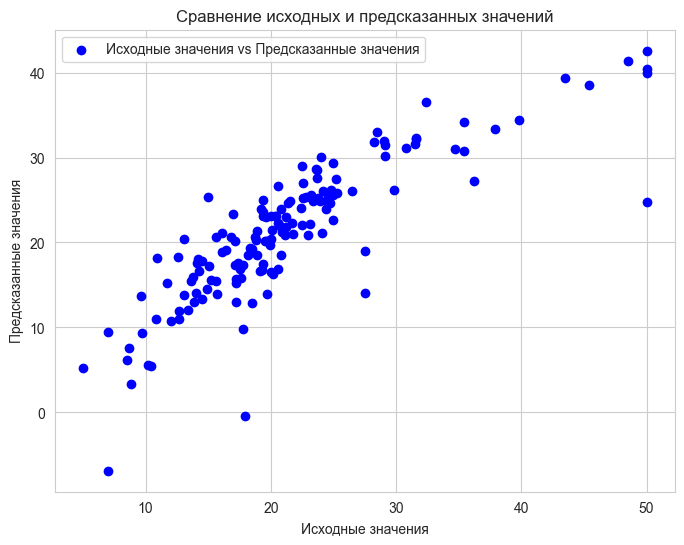

In [47]:
# График, на котором сравните исходные значения (y_test) и предсказанные значения (y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='b', label='Исходные значения vs Предсказанные значения')
plt.xlabel('Исходные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение исходных и предсказанных значений')
plt.legend()
plt.grid(True)
plt.show()

**Задание 8.**
Провести кросс-валидацию модели и оценить ее качество с помощью метрик MSE, RMSE и R^2.

In [48]:
# Модель линейной регрессии
model = LinearRegression()

# Выполняем кросс-валидацию с использованием MSE
mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# Отрицательное значение, так как Scikit-Learn оптимизирует на минимум, а нам нужно MSE

# Выполняем кросс-валидацию с использованием R^2
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Считаем RMSE на основе MSE
rmse_scores = np.sqrt(mse_scores)

print(f'Средний MSE: {mse_scores.mean()}')
print(f'Средний RMSE: {rmse_scores.mean()}')
print(f'Средний R^2: {r2_scores.mean()}')

Средний MSE: 37.131807467699055
Средний RMSE: 5.828658946215815
Средний R^2: 0.3532759243958788


**Задание 9.**
Попробовать улучшить качество модели путем отбора наиболее значимых переменных, использования регуляризации или других методов.

In [49]:
# модель L1 (Lasso) регуляризации с кросс-валидацией
lasso_cv_model = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)
lasso_cv_model.fit(X_train, y_train)

# наиболее значимые признаки с использованием L1-регуляризации
sfm = SelectFromModel(lasso_cv_model, prefit=True)
X_train_l1 = sfm.transform(X_train)
X_test_l1 = sfm.transform(X_test)

# Обучение модели на выбранных признаках
model_l1 = LinearRegression()
model_l1.fit(X_train_l1, y_train)

# прогнозы на тестовых данных
y_pred_l1 = model_l1.predict(X_test_l1)

# считаем метрики качества
mse_l1 = mean_squared_error(y_test, y_pred_l1)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred_l1)

print("Модель с L1 (Lasso) регуляризацией и отбором признаков:")
print(f'MSE: {mse_l1}')
print(f'RMSE: {rmse_l1}')
print(f'R^2: {r2_l1}')

Модель с L1 (Lasso) регуляризацией и отбором признаков:
MSE: 21.517444231177127
RMSE: 4.638689926172812
R^2: 0.7112260057484943


In [50]:
# Создайте модель L2 (Ridge) регуляризации с кросс-валидацией
ridge_cv_model = RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)
ridge_cv_model.fit(X_train, y_train)

# Выберите наиболее значимые признаки с использованием L2-регуляризации
sfm = SelectFromModel(ridge_cv_model, prefit=True)
X_train_l2 = sfm.transform(X_train)
X_test_l2 = sfm.transform(X_test)

# Обучите модель на выбранных признаках
model_l2 = LinearRegression()
model_l2.fit(X_train_l2, y_train)

# Сделайте прогнозы на тестовых данных
y_pred_l2 = model_l2.predict(X_test_l2)

# Рассчитайте метрики качества
mse_l2 = mean_squared_error(y_test, y_pred_l2)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred_l2)

# Выведите результаты
print("Модель с L2 (Ridge) регуляризацией и отбором признаков:")
print(f'MSE: {mse_l2}')
print(f'RMSE: {rmse_l2}')
print(f'R^2: {r2_l2}')

Модель с L2 (Ridge) регуляризацией и отбором признаков:
MSE: 34.27354056043347
RMSE: 5.854360815702553
R^2: 0.540033328380286


**Задание 10.**
Сделать выводы о качестве модели и ее применимости для предсказания цен на жилье в Бостоне.

In [51]:
print("Линейная регрессия")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}\n')

print("После кросс-валадации")
print(f'Средний MSE: {mse_scores.mean()}')
print(f'Средний RMSE: {rmse_scores.mean()}')
print(f'Средний R^2: {r2_scores.mean()}\n')

print("Модель с L1 (Lasso) регуляризацией и отбором признаков:")
print(f'MSE: {mse_l1}')
print(f'RMSE: {rmse_l1}')
print(f'R^2: {r2_l1}\n')

# Выведите результаты
print("Модель с L2 (Ridge) регуляризацией и отбором признаков:")
print(f'MSE: {mse_l2}')
print(f'RMSE: {rmse_l2}')
print(f'R^2: {r2_l2}')

Линейная регрессия
MAE: 3.1627098714573973
MSE: 21.517444231177127
RMSE: 4.638689926172812
R^2: 0.7112260057484943

После кросс-валадации
Средний MSE: 37.131807467699055
Средний RMSE: 5.828658946215815
Средний R^2: 0.3532759243958788

Модель с L1 (Lasso) регуляризацией и отбором признаков:
MSE: 21.517444231177127
RMSE: 4.638689926172812
R^2: 0.7112260057484943

Модель с L2 (Ridge) регуляризацией и отбором признаков:
MSE: 34.27354056043347
RMSE: 5.854360815702553
R^2: 0.540033328380286
